In [1]:
import re
import csv
import numpy as np
import matplotlib.pyplot as plt

plot_Reg_Exp = 'PLOT::'
msg_Comp_Reg_Exp = 'Sizeof gradients: '
runTime_Reg_Exp = 'RunTime Per window costs (in ms):'

f= open('new.log')

plot_data_sentance=''
msg_Comp_sentance=''
runTime_sentance=''

for line in f:
    if plot_Reg_Exp in line:
        plot_data_sentance = line[line.find(plot_Reg_Exp)+len(plot_Reg_Exp):]        
        plot_data_split = plot_data_sentance.split(",")
        with open('ConveragencePlot.csv', 'a') as csvFile:
            writer = csv.writer(csvFile , delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)        
            writer.writerow(plot_data_split)
            
    if msg_Comp_Reg_Exp in line:
        msg_Comp_sentance = line[line.find(msg_Comp_Reg_Exp)+len(msg_Comp_Reg_Exp):]
        msg_Comp_data_split = msg_Comp_sentance.split(",")        
        with open('msgCompPlot.csv', 'a') as csvFile:
            writer = csv.writer(csvFile , delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)        
            writer.writerow(msg_Comp_data_split)
            
    if runTime_Reg_Exp in line:
        runTime_sentance = line[line.find(runTime_Reg_Exp)+len(runTime_Reg_Exp):]
        runtime_data_split = runTime_sentance.split(",")        
        with open('runtime.csv', 'a') as csvFile:
            writer = csv.writer(csvFile , delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)        
            writer.writerow(runtime_data_split)

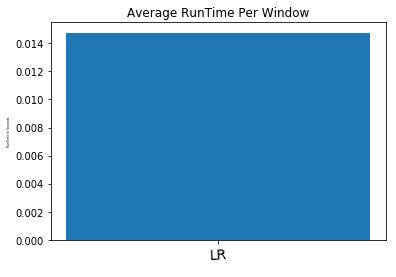

In [5]:
## plot the average runtime per window
runTimeTotal = 0
count = 0
avgRuntimeTotal = 0
with open('runtime.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')    
    for row in plots:
        runTimeTotal += int(row[0])
        count += 1
avgRuntimeTotal = (runTimeTotal / count ) / 1000

#Average runtime per window plot
AvgRunTime = []
AvgRunTime.append(float(avgRuntimeTotal))



###We need to change the label such as Logisitic Regression, SVM or Linear Regression based on the result

label = ['LR']
index = np.arange(len(label))
plt.bar(index, AvgRunTime)
plt.xlabel(' ', fontsize=3)
plt.ylabel('RunTime in Seconds', fontsize=3)
plt.xticks(index, label, fontsize=14, rotation=3)
plt.title('Average RunTime Per Window')
plt.show()

In [ ]:
## plot the average runtime per window
runTimeTotal = 0
count = 0
avgRuntimeTotal = 0
with open('runtime.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')    
    for row in plots:
        runTimeTotal += int(row[0])
        count += 1
avgRuntimeTotal = (runTimeTotal / count ) / 1000

#Average runtime per window plot
AvgRunTime = []
AvgRunTime.append(float(avgRuntimeTotal))

label = ['LR']
index = np.arange(len(label))
plt.bar(index, AvgRunTime)
plt.xlabel(' ', fontsize=14)
plt.ylabel('RunTime in Seconds', fontsize=14)
plt.xticks(index, label, fontsize=14, rotation=30)
plt.title('Message Size Compression')
plt.show()

#Plot Compression Rate
compRate = []
compRate.append(float(1.00))
compRate.append(float(avgRate))

label = ['Adam', 'Adam+Key+Quant+MinMax']
index = np.arange(len(label))
plt.bar(index, compRate)
plt.xlabel(' ', fontsize=14)
plt.ylabel('Compression Rate Values', fontsize=14)
plt.xticks(index, label, fontsize=14, rotation=30)
plt.title('Compression Rate')
plt.show()

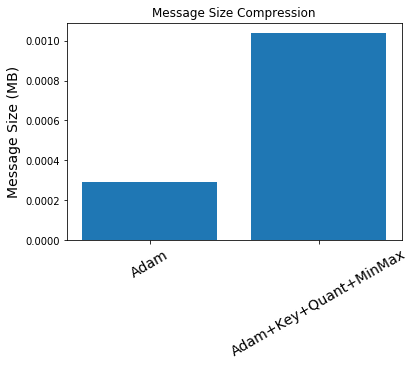

In [2]:
## plot the message size
originMsgTotalSize = 0
compMsgTotalSize = 0
count = 0
avgOriginMsgTotalSize = 0
avgCompMsgTotalSize = 0
avgRate = 0
with open('msgCompPlot.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')    
    for row in plots:
        originMsgTotalSize += int(row[1])
        compMsgTotalSize += float(row[2])
        count += 1
avgOriginMsgTotalSize = (originMsgTotalSize / count ) / 1000000
avgCompMsgTotalSize = (compMsgTotalSize / count ) / 1000000
avgRate = avgOriginMsgTotalSize / avgCompMsgTotalSize

#Message Size compression plot
AvgOrgCompMsg = []
AvgOrgCompMsg.append(float(avgOriginMsgTotalSize))
AvgOrgCompMsg.append(float(avgCompMsgTotalSize))

label = ['Adam', 'Adam+Key+Quant+MinMax']
index = np.arange(len(label))
plt.bar(index, AvgOrgCompMsg)
plt.xlabel(' ', fontsize=14)
plt.ylabel('Message Size (MB)', fontsize=14)
plt.xticks(index, label, fontsize=14, rotation=30)
plt.title('Message Size Compression')
plt.show()

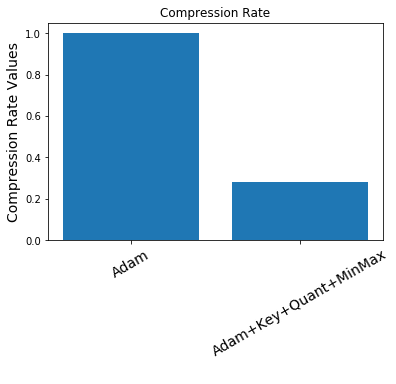

In [3]:
#Plot Compression Rate
compRate = []
compRate.append(float(1.00))
compRate.append(float(avgRate))

label = ['Adam', 'Adam+Key+Quant+MinMax']
index = np.arange(len(label))
plt.bar(index, compRate)
plt.xlabel(' ', fontsize=14)
plt.ylabel('Compression Rate Values', fontsize=14)
plt.xticks(index, label, fontsize=14, rotation=30)
plt.title('Compression Rate')
plt.show()

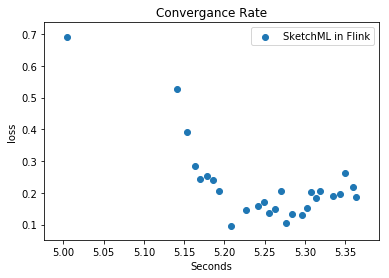

In [4]:
## plot the convergance rate (loss with time)
time = []
loss = []
auc = []
trueRecall = []
falseRecall = []
Precision = []

with open('ConveragencePlot.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        time.append(int(row[0])/1000)
        loss.append(float(row[1]))
        auc.append(float(row[2]))
        trueRecall.append(float(row[3]))
        falseRecall.append(float(row[4]))
        Precision.append(float(row[5]))

plt.scatter(time, loss, label='SketchML in Flink', marker='o');
plt.xlabel('Seconds')
plt.ylabel('loss')
plt.title('Convergance Rate')
plt.legend()
plt.figure()
#plt.show()

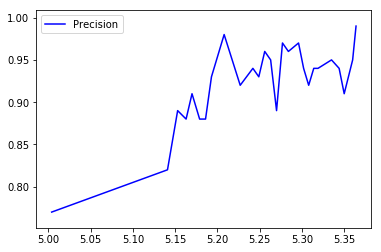

In [5]:
# Plot Percision twice and we have to choose the best fit
fig, ax = plt.subplots()
ax.plot(time, Precision, '-b', label='Precision')
ax.axis('equal')
leg = ax.legend();

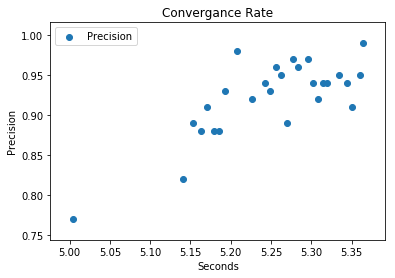

In [6]:
##Plot precision for the second time
plt.scatter(time, Precision, label='Precision', marker='o');
plt.xlabel('Seconds')
plt.ylabel('Precision')
plt.title('Convergance Rate')
plt.legend()
plt.figure()
#plt.show()

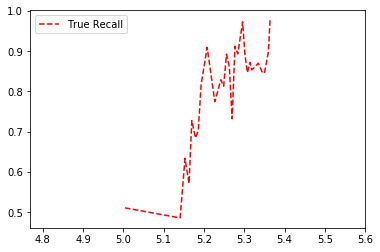

In [7]:
#Plot True Recall twice and we have to choose the best fit
fig, ax = plt.subplots()
ax.plot(time, trueRecall, '--r', label='True Recall')
ax.axis('equal')
leg = ax.legend();

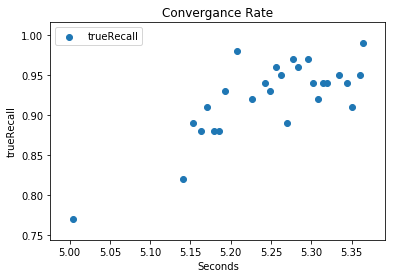

In [8]:
plt.scatter(time, Precision, label='trueRecall', marker='o');
plt.xlabel('Seconds')
plt.ylabel('trueRecall')
plt.title('Convergance Rate')
plt.legend()
plt.figure()
#plt.show()